In [3]:
import pandas as pd

df = pd.read_csv('data/COVID-19-Todesfaelle_in_Deutschland/COVID-19-Todesfaelle_Altersgruppen.csv')

#print(df[df['Todesfaelle']<10])

df = pd.read_csv('data/destatis-todesfälle-kw-2015-2024.csv',sep=';',na_values=['...','X'])
df = df[df['Year']<2024]
#df.to_csv('data/')
#df = df.pivot(columns=['Year','Age'])
df = df.melt(id_vars=["Year", "Age"], 
        var_name="Week", 
        value_name="Value").sort_values(by=['Year','Week','Age']).reset_index(drop=True)
df['Value'] = df['Value'].replace(' ','', regex=True)
print(df.head())
#print(df[df['Value']>20000])
cols = ['Year', 'Week']
#df['Datum']=df[cols].astype(str).apply('-W'.join, axis=1)
#df = df.drop('Year', axis=1)
#df = df.drop('Week', axis=1)
df['Year']=df['Year'].astype(int)
df['Week']=df['Week'].astype(int)
df = df.sort_values(by=['Year','Week','Age'])
df = df.set_index(['Year','Week'])
df.to_csv('data/destatis-todesfälle-kw-2015-2023-converted.csv')
df = pd.read_csv('data/destatis-todesfälle-kw-2015-2023-converted.csv',na_values=['X',''])
df = df.dropna()
df = df.set_index(['Year','Week'])
df.to_csv('data/destatis-todesfälle-kw-2015-2023-converted.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/COVID-19-Todesfaelle_in_Deutschland/COVID-19-Todesfaelle_Altersgruppen.csv'

In [ ]:
import pandas as pd

df = pd.read_csv('data/COVID-19-Todesfaelle_in_Deutschland/COVID-19-Todesfaelle_Altersgruppen.csv')

df[['Year', 'Week']] = df['Datum'].str.split('-W', n=1, expand=True)
df = df.drop('Datum', axis=1)
df = df.rename(columns={'Altersgruppe':'Age','Todesfaelle':'Value_Covid','Todesfaelle_gesamt':'Value_Covid_total'})
df['Year']=df['Year'].astype(int)
df['Week']=df['Week'].astype(int)
df = df.sort_values(by=['Year','Week','Age'])
df = df.set_index(['Year','Week'])
df.to_csv('data/COVID-19-Todesfaelle_Altersgruppen_converted.csv')
print(df.head())

             Age  Value_Covid  Value_Covid_total
Year Week                                       
2020 11      00+            9                  9
     11    00-04            0                  0
     11    05-14            0                  0
     11    15-34            0                  0
     11    35-59            1                  1


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

['2000-W1', '2000-W2', '2000-W3', '2000-W4', '2000-W5', '2000-W6', '2000-W7', '2000-W8', '2000-W9', '2000-W10', '2000-W11', '2000-W12', '2000-W13', '2000-W14', '2000-W15', '2000-W16', '2000-W17', '2000-W18', '2000-W19', '2000-W20', '2000-W21', '2000-W22', '2000-W23', '2000-W24', '2000-W25', '2000-W26', '2000-W27', '2000-W28', '2000-W29', '2000-W30', '2000-W31', '2000-W32', '2000-W33', '2000-W34', '2000-W35', '2000-W36', '2000-W37', '2000-W38', '2000-W39', '2000-W40', '2000-W41', '2000-W42', '2000-W43', '2000-W44', '2000-W45', '2000-W46', '2000-W47', '2000-W48', '2000-W49', '2000-W50', '2000-W51', '2000-W52', '2000-W53', '2001-W1', '2001-W2', '2001-W3', '2001-W4', '2001-W5', '2001-W6', '2001-W7', '2001-W8', '2001-W9', '2001-W10', '2001-W11', '2001-W12', '2001-W13', '2001-W14', '2001-W15', '2001-W16', '2001-W17', '2001-W18', '2001-W19', '2001-W20', '2001-W21', '2001-W22', '2001-W23', '2001-W24', '2001-W25', '2001-W26', '2001-W27', '2001-W28', '2001-W29', '2001-W30', '2001-W31', '2001-W32

<Axes: xlabel='Year,Week'>

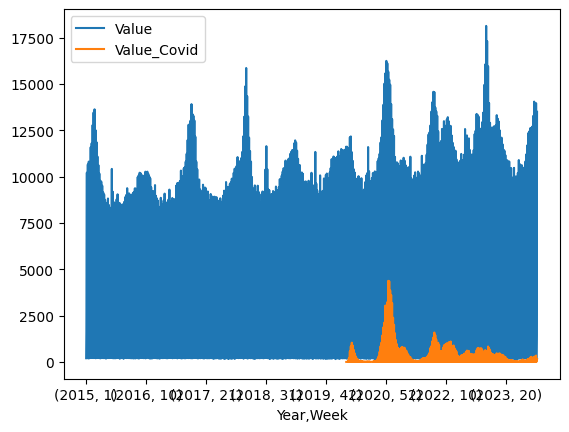

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

destatis_age={'0-29':1,'30-34':2,
              '35-39':3,'40-44':4,
              '45-49':5,'50-54':6,
              '55-59':7,'60-64':8,
              '65-69':9,'70-74':10,
              '75-79':11,'80-84':12,
              '85-89':13,'90-94':14,
              '95+':15}
inv_destatis_age= {v: k for k, v in destatis_age.items()}
rki_age={'00-04':1,'05-14':2,
         '15-34':3,'35-59':4,
         '60-79':5,'80+':6}
inv_rki_age= {v: k for k, v in rki_age.items()}
common_age={'0-34':1,'35-59':2,
            '60-79':3,'80+':4}
datum_sort = []
for year in range(2000,2024):
    for week in range(1,54):
        datum_sort.append(f'{year}-W{week}')
print(datum_sort)
inv_common_age= {v: k for k, v in common_age.items()}
def aggregate_age(dataframe,age_span=[95,110],replace=False,new_age_group='',key='Age'):
    #dataframe['Age'] = dataframe['Age'].map(age_year_to_int)
    age_sum = dataframe[(dataframe[key] >= age_span[0]) & (dataframe[key] <= age_span[1])].groupby(['Year', 'Week']).sum().reset_index()
    age_sum[key] = new_age_group#f'{age_span[0]}+' if age_span[1]==110 else f'{age_span[0]}-{age_span[1]}'
    if replace:
        dataframe = dataframe[(dataframe[key] < age_span[0]) | (dataframe[key] > age_span[1])]
        dataframe = pd.concat([dataframe, age_sum]).sort_values(by=['Year', 'Week', key])
        return dataframe
    else:
        return age_sum

df = pd.read_csv('data/destatis-todesfälle-kw-2015-2023-converted.csv')
df = df[df['Age']!='Insgesamt']
df['Age']=df['Age'].map(destatis_age)
df.to_csv('test.csv')
df['Age']=df['Age'].astype(int)
df = aggregate_age(df,[1,2],True,1)
df = aggregate_age(df,[3,7],True,2)
df = aggregate_age(df,[8,11],True,3)
df = aggregate_age(df,[12,15],True,4)
df['Age']=df['Age'].map(inv_common_age)
df2 = pd.read_csv('data/COVID-19-Todesfaelle_Altersgruppen_converted.csv')
print(df2.head())
df2 = df2[df2['Age']!='00+']
df2['Age']=df2['Age'].map(rki_age)
df2['Age']=df2['Age'].astype(int)
df2 = aggregate_age(df2,[1,3],True,1)
df2 = aggregate_age(df2,[4,4],True,2)
df2 = aggregate_age(df2,[5,5],True,3)
df2 = aggregate_age(df2,[6,6],True,4)
df2['Age']=df2['Age'].map(inv_common_age)
df_merge = df.merge(df2,on=['Year','Week','Age'],how='left')
#df_merge['Datum'] = pd.Categorical(df_merge['Datum'], datum_sort)
df_merge = df_merge.sort_values(['Year','Week','Age'])
df_merge = df_merge.set_index(['Year','Week'])
df_merge.to_csv('data/combined.csv')
df_merge=df_merge.drop('Value_Covid_total',axis=1)
df_merge.to_csv('data/combined.csv')
df_merge.plot()


<Axes: >

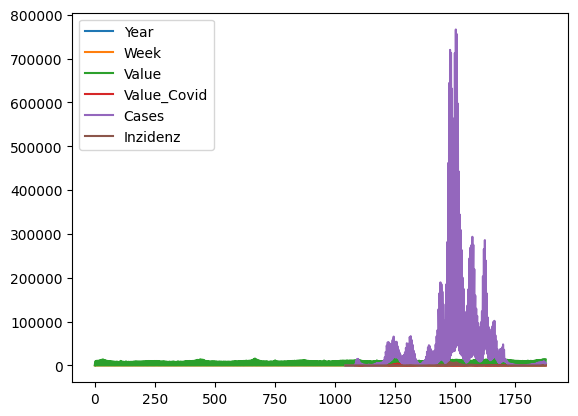

In [ ]:
def aggregate_age(dataframe,age_span=[95,110],replace=False,new_age_group='',key='Age'):
    #dataframe['Age'] = dataframe['Age'].map(age_year_to_int)
    age_sum = dataframe[(dataframe[key] >= age_span[0]) & (dataframe[key] <= age_span[1])].groupby(['Date']).sum().reset_index()
    age_sum[key] = new_age_group#f'{age_span[0]}+' if age_span[1]==110 else f'{age_span[0]}-{age_span[1]}'
    if replace:
        dataframe = dataframe[(dataframe[key] < age_span[0]) | (dataframe[key] > age_span[1])]
        dataframe = pd.concat([dataframe, age_sum]).sort_values(by=['Date', key])
        return dataframe
    else:
        return age_sum
incidenz = pd.read_csv('data/COVID-19_7-Tage-Inzidenz_in_Deutschland/COVID-19-Faelle_7-Tage-Inzidenz_Deutschland.csv')
incidenz.columns = ['Date','Age','Population','Faelle_gesamt','Faelle_neu','Cases','Inzidenz']
incidenz = incidenz[incidenz['Age']!='00+']
incidenz['Age']=incidenz['Age'].map(rki_age)
incidenz['Age']=incidenz['Age'].astype(int)
incidenz = aggregate_age(incidenz,[1,3],True,1)
incidenz = aggregate_age(incidenz,[4,4],True,2)
incidenz = aggregate_age(incidenz,[5,5],True,3)
incidenz = aggregate_age(incidenz,[6,6],True,4)
incidenz['Age']=incidenz['Age'].map(inv_common_age)

incidenz['Date'] = pd.to_datetime(incidenz['Date'])

incidenz['Year'] = incidenz['Date'].dt.year
incidenz['Week'] = incidenz['Date'].dt.isocalendar().week

incidenz = incidenz.sort_values(by=['Date'])

incidenz_weekly = incidenz.groupby(['Year', 'Week', 'Age']).last().reset_index()

incidenz_weekly = incidenz_weekly[['Year','Week','Age','Cases','Inzidenz']]
df_merge2 = df_merge.merge(incidenz_weekly,on=['Year','Week','Age'],how='left')
df_merge2.to_csv('test.csv')
# Ausgabe des neuen DataFrames
df_merge2.plot()

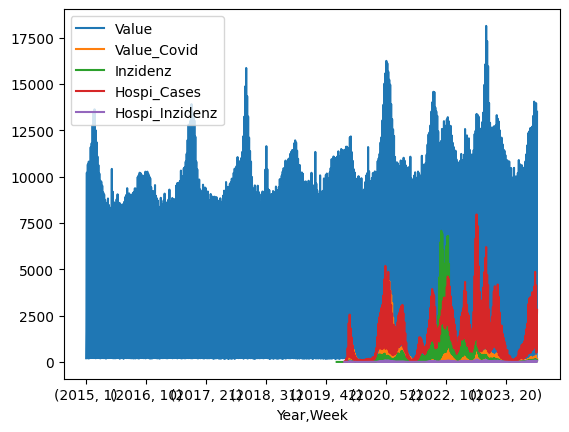

In [ ]:
hospi = pd.read_csv('data/COVID-19-Hospitalisierungen_in_Deutschland/Aktuell_Deutschland_COVID-19-Hospitalisierungen.csv')
hospi = hospi[hospi['Bundesland']=='Bundesgebiet']
hospi = hospi.drop(columns=['Bundesland','Bundesland_Id'])
hospi.columns = ['Date','Age','Hospi_Cases','Hospi_Inzidenz']
hospi = hospi[hospi['Age']!='00+']
hospi['Age']=hospi['Age'].map(rki_age)
hospi['Age']=hospi['Age'].astype(int)
hospi = aggregate_age(hospi,[1,3],True,1)
hospi = aggregate_age(hospi,[4,4],True,2)
hospi = aggregate_age(hospi,[5,5],True,3)
hospi = aggregate_age(hospi,[6,6],True,4)
hospi['Age']=hospi['Age'].map(inv_common_age)

hospi['Date'] = pd.to_datetime(hospi['Date'])

hospi['Year'] = hospi['Date'].dt.year
hospi['Week'] = hospi['Date'].dt.isocalendar().week

hospi = hospi.sort_values(by=['Date'])

hospi_weekly = hospi.groupby(['Year', 'Week', 'Age']).last().reset_index()

hospi_weekly = hospi_weekly[['Year','Week','Age','Hospi_Cases','Hospi_Inzidenz']]
df_merge3 = df_merge2.merge(hospi_weekly,on=['Year','Week','Age'],how='left')
df_merge3.to_csv('test.csv')
df_merge3 = df_merge3.set_index(['Year','Week'])
df_merge3.drop(columns=['Cases']).plot()
df_merge3  = df_merge3.reset_index()

In [ ]:
df_merge3_aggregated = df_merge3.groupby(['Year', 'Week']).sum().reset_index()
df_merge3_aggregated['Age'] = 'gesamt'
df_merge3_combined = pd.concat([df_merge3, df_merge3_aggregated], ignore_index=True)

impf = pd.read_csv('data/COVID-19-Impfungen_in_Deutschland/Deutschland_Landkreise_COVID-19-Impfungen.csv')
impf.columns = ['Date','LandkreisId_Impfort','Age','Impfschutz','Anzahl']

impf['Date'] = pd.to_datetime(impf['Date'])

impf['Age'] = "gesamt"

impf['Erstimpfung'] = impf.apply(lambda x: x['Anzahl'] if x['Impfschutz'] == 1 else 0, axis=1)
impf['Zweitimpfung'] = impf.apply(lambda x: x['Anzahl'] if x['Impfschutz'] == 2 else 0, axis=1)
impf['Booster'] = impf.apply(lambda x: x['Anzahl'] if x['Impfschutz'] > 2 else 0, axis=1)

impf['Year'] = impf['Date'].dt.year
impf['Week'] = impf['Date'].dt.isocalendar().week

impf_aggregated = impf.groupby(['Year', 'Week', 'Age']).agg({
    'Erstimpfung': 'sum',
    'Zweitimpfung': 'sum',
    'Booster': 'sum'
}).reset_index()
df_merge4 = df_merge3_combined.merge(impf_aggregated,on=['Year','Week','Age'],how='left')

age_order = df_merge4['Age'].unique()
df_merge4.reset_index(drop=True)
df_merge4.set_index(['Year','Week','Age'],inplace = True)
categories = pd.CategoricalIndex(df_merge4.index.levels[2].values,
                            categories=age_order,
                            ordered=True)
df_merge4.index=df_merge4.index.set_levels(categories, level='Age')
df_merge4.sort_index(inplace=True)

df_merge4.to_csv('data/combined.csv')

/tmp/ipykernel_95550/4209697856.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  impf = pd.read_csv('data/COVID-19-Impfungen_in_Deutschland/Deutschland_Landkreise_COVID-19-Impfungen.csv')


In [ ]:
import pandas as pd
pol = pd.read_csv('data2/Policy.csv')
pol = pol.drop(columns=['PolicySource','Jurisdiction'])
pol = pol.query('ID == "DE" | ID == "FR" | ID == "SE" | ID == "IT"')
pol.reset_index(drop=True).set_index(['ID','Date','PolicyType']).to_csv('Policy.csv')

/tmp/ipykernel_5953/2105075745.py:2: DtypeWarning: Columns (0,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  pol = pd.read_csv('data2/Policy.csv')


In [19]:
pol = pd.read_csv('data/Policy.csv')
pol = pol.query('ID == "DE"')
pol = pol.drop(columns=['ID'])
pol_pivoted = pol.pivot(index='Date', columns='PolicyType', values='PolicyValue').reset_index()
pol_pivoted['Date'] = pd.to_datetime(pol_pivoted['Date'])
pol_pivoted['Year'] = pol_pivoted['Date'].dt.year
pol_pivoted['Week'] = pol_pivoted['Date'].dt.isocalendar().week
pol_aggregated = pol_pivoted.groupby(['Year', 'Week']).agg({
'C1':'max',
'C1E':'max',
'C1M':'max',
'C1NV':'max',
'C1V':'max',
'C2':'max',
'C2E':'max',
'C2M':'max',
'C2NV':'max',
'C2V':'max',
'C3':'max',
'C3E':'max',
'C3M':'max',
'C3NV':'max',
'C3V':'max',
'C4':'max',
'C4E':'max',
'C4M':'max',
'C4NV':'max',
'C4V':'max',
'C5':'max',
'C5E':'max',
'C5M':'max',
'C5NV':'max',
'C5V':'max',
'C6':'max',
'C6E':'max',
'C6M':'max',
'C6NV':'max',
'C6V':'max',
'C7':'max',
'C7E':'max',
'C7M':'max',
'C7NV':'max',
'C7V':'max',
'C8':'max',
'C8E':'max',
'C8EV':'max',
'C8NV':'max',
'C8V':'max',
'Cases':'max',
'Deaths':'max',
'E1':'max',
'E1E':'max',
'E2':'max',
'E2E':'max',
'E3':'max',
'E3E':'max',
'E4':'max',
'E4E':'max',
'H1':'max',
'H1E':'max',
'H2':'max',
'H2E':'max',
'H3':'max',
'H3E':'max',
'H4':'max',
'H4E':'max',
'H5':'max',
'H5E':'max',
'H6':'max',
'H6E':'max',
'H6M':'max',
'H6NV':'max',
'H6V':'max',
'H7':'max',
'H7E':'max',
'H8':'max',
'H8E':'max',
'H8M':'max',
'H8NV':'max',
'H8V':'max',
'I1':'max',
'I1D':'max',
'I1NV':'max',
'I1S':'max',
'I1V':'max',
'I1W':'max',
'I2':'max',
'I2D':'max',
'I3':'max',
'I3D':'max',
'I3NV':'max',
'I3S':'max',
'I3V':'max',
'I3W':'max',
'I4':'max',
'I4D':'max',
'I4L':'max',
'I4NV':'max',
'I4S':'max',
'I4V':'max',
'I4W':'max',
'M1':'max',
'M1E':'max',
'V1':'max',
'V2':'max',
'V2A':'max',
'V2B':'max',
'V2C':'max',
'V2D':'max',
'V2E':'max',
'V2F':'max',
'V2G':'max',
'V3':'max',
'V4':'max'}).reset_index()
pol['Date'] = pd.to_datetime(pol['Date'])
pol['Year'] = pol['Date'].dt.year
pol['Week'] = pol['Date'].dt.isocalendar().week
pol_aggregated.set_index(['Year','Week'],inplace=True)
pol_aggregated['PolicyNotes'] = pol.groupby(['Year', 'Week'])['PolicyNotes'].agg(lambda x: list(filter(lambda y: str(y)!='nan',list(set(x)))))
pol_aggregated.to_csv('data/Policy_Weekly.csv')


In [8]:
pol = pd.read_csv('data/Policy.csv')
for pol_type in pol['PolicyType'].unique():
    print(f"'{pol_type}':'max',")
print(pol['PolicyType'].unique())

'C1':'max',
'C1E':'max',
'C1M':'max',
'C1NV':'max',
'C1V':'max',
'C2':'max',
'C2E':'max',
'C2M':'max',
'C2NV':'max',
'C2V':'max',
'C3':'max',
'C3E':'max',
'C3M':'max',
'C3NV':'max',
'C3V':'max',
'C4':'max',
'C4E':'max',
'C4M':'max',
'C4NV':'max',
'C4V':'max',
'C5':'max',
'C5E':'max',
'C5M':'max',
'C5NV':'max',
'C5V':'max',
'C6':'max',
'C6E':'max',
'C6M':'max',
'C6NV':'max',
'C6V':'max',
'C7':'max',
'C7E':'max',
'C7M':'max',
'C7NV':'max',
'C7V':'max',
'C8':'max',
'C8E':'max',
'C8EV':'max',
'C8NV':'max',
'C8V':'max',
'Cases':'max',
'Deaths':'max',
'E1':'max',
'E1E':'max',
'E2':'max',
'E2E':'max',
'E3':'max',
'E3E':'max',
'E4':'max',
'E4E':'max',
'H1':'max',
'H1E':'max',
'H2':'max',
'H2E':'max',
'H3':'max',
'H3E':'max',
'H4':'max',
'H4E':'max',
'H5':'max',
'H5E':'max',
'H6':'max',
'H6E':'max',
'H6M':'max',
'H6NV':'max',
'H6V':'max',
'H7':'max',
'H7E':'max',
'H8':'max',
'H8E':'max',
'H8M':'max',
'H8NV':'max',
'H8V':'max',
'I1':'max',
'I1D':'max',
'I1NV':'max',
'I1S':'max',
'I1V':'max',
'I1